Lab 8

**WordNet** is a large lexical database of English. 

Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.
WordNet’s structure makes it a useful tool for computational linguistics and natural language processing.

WordNet superficially resembles a thesaurus, in that it groups words together based on their meanings. However, there are some important distinctions.

* First, WordNet interlinks not just word forms—strings of letters—but specific senses of words. As a result, words that are found in close proximity to one another in the network are semantically disambiguated.




* Second, WordNet labels the semantic relations among words, whereas the 
groupings of words in a thesaurus does not follow any explicit pattern other than meaning similarity.

In [2]:
from nltk.corpus import wordnet

In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
syns= wordnet.synsets("program")

In [5]:
print(syns[0].name())

plan.n.01


In [6]:
print(syns[0].lemmas()[0].name())

plan


In [7]:
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


In [8]:
 print(syns[0].examples())

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [9]:
synonyms=[]
antonyms=[]


for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'full', 'practiced', 'salutary', 'estimable', 'beneficial', 'near', 'secure', 'dear', 'good', 'skillful', 'just', 'goodness', 'honorable', 'expert', 'sound', 'undecomposed', 'effective', 'well', 'serious', 'proficient', 'in_force', 'skilful', 'honest', 'thoroughly', 'unspoiled', 'in_effect', 'commodity', 'unspoilt', 'soundly', 'upright', 'adept', 'respectable', 'trade_good', 'ripe', 'right', 'safe', 'dependable'}
{'evilness', 'badness', 'bad', 'evil', 'ill'}


Let's look a bit deeper into Synsets

**Synset** is a special kind of a simple interface that is present in NLTK to look up words in WordNet. Synset instances are the groupings of synonymous words that express the same concept. Some of the words have only one Synset and some have several.

Code #1 : Understanding Synset



In [13]:
from nltk.corpus import wordnet 
syn = wordnet.synsets('hello')[0] 

print ("Synset name : ", syn.name()) 

# Defining the word 
print ("\nSynset meaning : ", syn.definition()) 

# list of phrases that use the word in context 
print ("\nSynset example : ", syn.examples()) 


Synset name :  hello.n.01

Synset meaning :  an expression of greeting

Synset example :  ['every morning they exchanged polite hellos']


wordnet.synsets(word) can be used to get a list of Synsets. This list can be empty (if no such word is found) or can have few elements.
 


**Hypernyms and Hyponyms –**



Hypernyms: More abstract terms.

Hyponyms: More specific terms.

Both come to picture as Synsets are organized in a structure similar to that of an inheritance tree. This tree can be traced all the way up to a root hypernym. Hypernyms provide a way to categorize and group words based on their similarity to each other.



Code #2 : Understanding Hypernerms and Hyponyms

In [14]:
from nltk.corpus import wordnet 
syn = wordnet.synsets('hello')[0] 

print ("Synset name : ", syn.name()) 

print ("\nSynset abstract term : ", syn.hypernyms()) 

print ("\nSynset specific term : ", 
	syn.hypernyms()[0].hyponyms()) 

syn.root_hypernyms() 

print ("\nSynset root hypernerm : ", syn.root_hypernyms()) 


Synset name :  hello.n.01

Synset abstract term :  [Synset('greeting.n.01')]

Synset specific term :  [Synset('calling_card.n.02'), Synset('good_afternoon.n.01'), Synset('good_morning.n.01'), Synset('hail.n.03'), Synset('hello.n.01'), Synset('pax.n.01'), Synset('reception.n.01'), Synset('regard.n.03'), Synset('salute.n.02'), Synset('salute.n.03'), Synset('welcome.n.02'), Synset('well-wishing.n.01')]

Synset root hypernerm :  [Synset('entity.n.01')]


Code #3 : Part of Speech (POS) in Synset.



In [15]:
syn = wordnet.synsets('hello')[0] 
print ("Syn tag : ", syn.pos()) 

syn = wordnet.synsets('doing')[0] 
print ("Syn tag : ", syn.pos()) 

syn = wordnet.synsets('beautiful')[0] 
print ("Syn tag : ", syn.pos()) 

syn = wordnet.synsets('quickly')[0] 
print ("Syn tag : ", syn.pos()) 


Syn tag :  n
Syn tag :  v
Syn tag :  a
Syn tag :  r


**Wu Palmer: WordNet Similarity**

How Wu & Palmer Similarity works ?
It calculates relatedness by considering the depths of the two synsets in the WordNet taxonomies, along with the depth of the LCS (Least Common Subsumer).

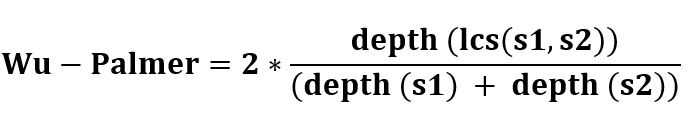

The score can be 0 < score <= 1. The score can never be zero because the depth of the LCS is never zero (the depth of the root of taxonomy is one).
It calculates the similarity based on how similar the word senses are and where the Synsets occur relative to each other in the hypernym tree.



Now , let’s compare the similarity index of any two words

In [10]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


In [11]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
print(w1.wup_similarity(w2))

0.6956521739130435


In [12]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('cat.n.01')
print(w1.wup_similarity(w2))

0.32
